In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact

In [2]:
data = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Crop_recommendation.csv')

In [3]:
data

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [4]:
print("Shape of Data :", data.shape)

Shape of Data : (2200, 8)


In [5]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [6]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [7]:
data['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [8]:
print("Ratio of Nitrogen in the Soil: {0:.2f}".format(data['N'].mean()))
print("Ratio of Phosphorous in the Soil:{0:.2f}".format(data['P'].mean()))
print("Ratio of Potassium in the Soil:{0:.2f}".format(data['K'].mean()))
print("Ratio of temperature in the Soil:{0:.2f}".format(data['temperature'].mean()))
print("Ratio of Humidity in the Soil:{0:.2f}".format(data['humidity'].mean()))
print("Ratio of PH in the Soil:{0:.2f}".format(data['ph'].mean()))
print("Ratio of Nitrogen in the Soil:{0:.2f}".format(data['rainfall'].mean()))

Ratio of Nitrogen in the Soil: 50.55
Ratio of Phosphorous in the Soil:53.36
Ratio of Potassium in the Soil:48.15
Ratio of temperature in the Soil:25.62
Ratio of Humidity in the Soil:71.48
Ratio of PH in the Soil:6.47
Ratio of Nitrogen in the Soil:103.46


In [9]:
#Lets check the Summary Statistics for each of the crops
@interact
def summary(crops=list(data['label'].value_counts().index)):
    X = data[data['label'] == crops]
    print("-----------------------------------------")
    print("Statistics of Nitrogen")
    print("Minimum Nitrogen Required :",X['N'].min())
    print("Average Nitrogen Required :",X['N'].mean())
    print("Maximum Nitrogen Required :",X['N'].max())
    print("-----------------------------------------")
    print("Statistics of Phosphorous")
    print("Minimum Phosphorous Required :",X['P'].min())
    print("Average Phosphorous Required :",X['P'].mean())
    print("Maximum Phosphorous Required :",X['P'].max())
    print("-----------------------------------------")
    print("Statistics of Potassium")
    print("Minimum Potassium Required :",X['K'].min())
    print("Average Potassium Required :",X['K'].mean())
    print("Maximum Potassium Required :",X['K'].max())
    print("-----------------------------------------")
    print("Statistics of Temperature")
    print("Minimum Temperature Required :{0:2f}".format(X['temperature'].min()))
    print("Average Temperature Required :{0:2f}".format(X['temperature'].mean()))
    print("Maximum Temperature Required :{0:2f}".format(X['temperature'].max()))
    print("-----------------------------------------")
    print("Statistics of Humidity")
    print("Minimum Humidity Required :{0:2f}".format(X['humidity'].min()))
    print("Average Humidity Required :{0:2f}".format(X['humidity'].mean()))
    print("Maximum Humidity Required :{0:2f}".format(X['humidity'].max()))
    print("-----------------------------------------")
    print("Statistics of PH")
    print("Minimum PH Required :{0:2f}".format(X['ph'].min()))
    print("Average PH Required :{0:2f}".format(X['ph'].mean()))
    print("Maximum PH Required :{0:2f}".format(X['ph'].max()))
    print("-----------------------------------------")
    print("Statistics of Rainfall")
    print("Minimum Rainfall Required :{0:2f}".format(X['rainfall'].min()))
    print("Average Rainfall Required :{0:2f}".format(X['rainfall'].mean()))
    print("Maximum Rainfall Required :{0:2f}".format(X['rainfall'].max()))
    print("-----------------------------------------")

interactive(children=(Dropdown(description='crops', options=('rice', 'maize', 'jute', 'cotton', 'coconut', 'pa…

In [10]:
#Lets compare the average requirements for each with average conditions
@interact
def compare(conditions=['N','P','K','temperature','ph','humidity','rainfall']):
    print("Average value for",conditions,"is {0:2f}".format(data[conditions].mean()))
    print("-------------------------------------------------------")
    print("Rice: {:.2f}".format(data[data['label'] == 'rice'][conditions].mean()))
    print("Black Grams: {:.2f}".format(data[data['label'] == 'blackrams'][conditions].mean()))
    print("Banana: {:.2f}".format(data[data['label'] == 'banana'][conditions].mean()))
    print("Jute: {:.2f}".format(data[data['label'] == 'jute'][conditions].mean()))
    print("Coconut: {:.2f}".format(data[data['label'] == 'coconut'][conditions].mean()))
    print("Apple: {:.2f}".format(data[data['label'] == 'apple'][conditions].mean()))
    print("Papaya: {:.2f}".format(data[data['label'] == 'papaya'][conditions].mean()))
    print("Muskmelon: {:.2f}".format(data[data['label'] == 'Muskmelon'][conditions].mean()))
    print("Grapes: {:.2f}".format(data[data['label'] == 'grapes'][conditions].mean()))
    print("Watermelon: {:.2f}".format(data[data['label'] == 'watermelon'][conditions].mean()))
    print("Kidney Beans: {:.2f}".format(data[data['label'] == 'kidneybeans'][conditions].mean()))
    print("Mung Beans: {:.2f}".format(data[data['label'] == 'mungbean'][conditions].mean()))
    print("Oranges: {:.2f}".format(data[data['label'] == 'orange'][conditions].mean()))
    print("Chick Peas: {:.2f}".format(data[data['label'] == 'chickpea'][conditions].mean()))
    print("Lentils: {:.2f}".format(data[data['label'] == 'lentil'][conditions].mean()))
    print("Cotton: {:.2f}".format(data[data['label'] == 'cotton'][conditions].mean()))
    print("Maize: {:.2f}".format(data[data['label'] == 'maize'][conditions].mean()))
    print("Moth Beans: {:.2f}".format(data[data['label'] == 'mothbeans'][conditions].mean()))
    print("Pigeon Peas: {:.2f}".format(data[data['label'] == 'pigeonpeas'][conditions].mean()))
    print("Mango: {:.2f}".format(data[data['label'] == 'mango'][conditions].mean()))
    print("Pomegranate: {:.2f}".format(data[data['label'] == 'pomegranate'][conditions].mean()))
    print("Coffee: {:.2f}".format(data[data['label'] == 'coffee'][conditions].mean()))

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'ph', 'humidit…

In [11]:
data['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [12]:
@interact
def compare(conditions = ['N','P','K','temperature','ph','humidity','rainfall']):
    print("Crops with require greater than average", conditions,'\n')
    print(data[data[conditions]>data[conditions].mean()]['label'].unique())
    print("-------------------------------------------------")
    print("Crops which require less than average", conditions,'\n')
    print(data[data[conditions]<=data[conditions].mean()]['label'].unique())

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'ph', 'humidit…

<ipython-input-13-a22f28b8bbf7>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,4,1)
<ipython-input-13-a22f28b8bbf7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['K'], color = 'darkblue')
<ipython-input-13-a22f28b8bbf7>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating you

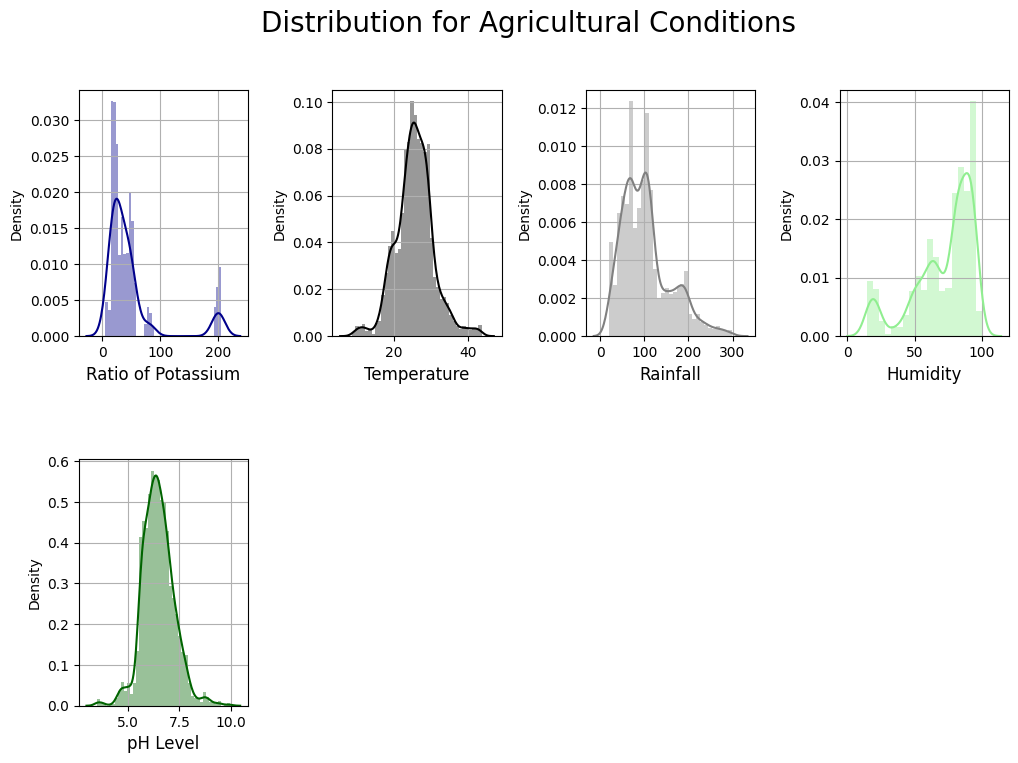

In [13]:
plt.subplots(figsize=(12, 8))
plt.subplot(2,4,1)
sns.distplot(data['K'], color = 'darkblue')
plt.xlabel('Ratio of Potassium', fontsize = 12)
plt.grid()

plt.subplot(2,4,2)
sns.distplot(data['temperature'],color = 'black')
plt.xlabel('Temperature', fontsize=12)
plt.grid()

plt.subplot(2,4,3)
sns.distplot(data['rainfall'], color='grey')
plt.xlabel('Rainfall', fontsize=12)
plt.grid()

plt.subplot(2,4,4)
sns.distplot(data['humidity'], color='lightgreen')
plt.xlabel('Humidity', fontsize=12)
plt.grid()

plt.subplot(2,4,5)
sns.distplot(data['ph'], color = 'darkgreen')
plt.xlabel('pH Level', fontsize=12)
plt.grid()

plt.suptitle('Distribution for Agricultural Conditions', fontsize = 20)
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

In [14]:
print("Some Interesting Patterns")
print("---------------------------------------")
print("Crops which requires very High Ratio of Nitrogen Content in Soil:", data[data['N']>120]['label'].unique())
print("Crops which requires very High Ratio of Phosphorous Content in Soil:", data[data['P']>100]['label'].unique())
print("Crops which requires very High Ratio of Potassium Content in Soil:", data[data['K']>200]['label'].unique())
print("Crops which requires very High Rainfall:", data[data['rainfall']>200]['label'].unique())
print("Crops which requires very Low Temperature:", data[data['temperature']<10]['label'].unique())
print("Crops which requires very High Temperature:", data[data['temperature']>40]['label'].unique())
print("Crops which requires very Low Humidity:", data[data['humidity']<20]['label'].unique())
print("Crops which requires very Low pH:", data[data['ph']<4]['label'].unique())
print("Crops which requires very High pH:", data[data['ph']>9]['label'].unique())

Some Interesting Patterns
---------------------------------------
Crops which requires very High Ratio of Nitrogen Content in Soil: ['cotton']
Crops which requires very High Ratio of Phosphorous Content in Soil: ['grapes' 'apple']
Crops which requires very High Ratio of Potassium Content in Soil: ['grapes' 'apple']
Crops which requires very High Rainfall: ['rice' 'papaya' 'coconut']
Crops which requires very Low Temperature: ['grapes']
Crops which requires very High Temperature: ['grapes' 'papaya']
Crops which requires very Low Humidity: ['chickpea' 'kidneybeans']
Crops which requires very Low pH: ['mothbeans']
Crops which requires very High pH: ['mothbeans']


In [15]:
#Lets understand which crops can only be Grown in Summer Season, Winter Season and Rainy Season

print("Summmer Crops")
print(data[(data['temperature'] > 30) & (data['humidity'] > 50)]['label'].unique())
print("----------------------------------")
print("Winter Crops")
print(data[(data['temperature'] < 20) & (data['humidity'] > 30)]['label'].unique())
print("----------------------------------")
print("Rainy Crops")
print(data[(data['rainfall'] > 200) & (data['humidity'] > 30)]['label'].unique())

Summmer Crops
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
----------------------------------
Winter Crops
['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']
----------------------------------
Rainy Crops
['rice' 'papaya' 'coconut']


In [16]:
from sklearn.cluster import KMeans

#removing the labels column
x=data.drop(['label'],axis=1)

#selecting all the values of data
x = x.values

#checking the shape
print(x.shape)

(2200, 7)


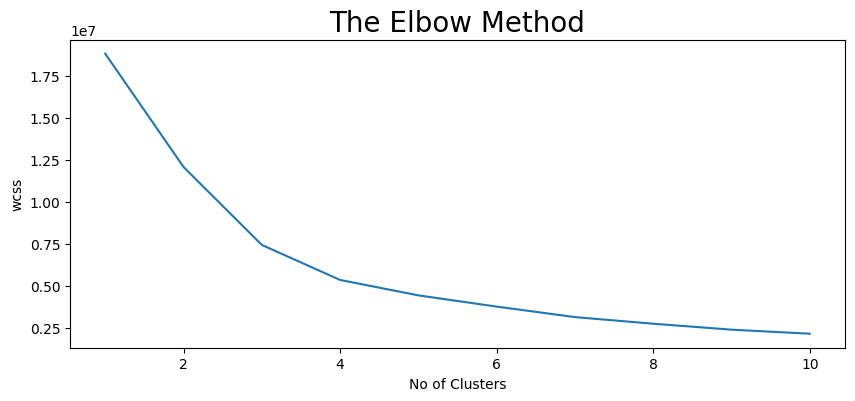

In [17]:
#lets determine the optimum Number of Clusters within the Dataset
#Using the elbow Method

plt.rcParams['figure.figsize'] = (10,4)

wcss = []
for i in range(1,11):
    km = KMeans(n_clusters = i, init = 'k-means++',max_iter=300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)

#Lets Plot the results
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No of Clusters')
plt.ylabel('wcss')
plt.show()

In [18]:
#Lets implement the K Means algorithm to perform Clustering analysis
km = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10,random_state=0)
y_means=km.fit_predict(x)

#Lets find out the Results
a = data['label']
y_means = pd.DataFrame(y_means)
z = pd.concat([y_means, a], axis = 1)
z = z.rename(columns = {0: 'cluster'})

#Lets Check the cluster of each crops
print("Lets check the Results After Applying the K Means Clustering Analysis \n")
print("Crops in First Cluster:", z[z['cluster']==0]['label'].unique())
print("-------------------------------------------------------------")
print("Crops in Second Cluster:", z[z['cluster']==1]['label'].unique())
print("-------------------------------------------------------------")
print("Crops in Third Cluster:", z[z['cluster']==2]['label'].unique())
print("-------------------------------------------------------------")
print("Crops in Forth Cluster:", z[z['cluster']==3]['label'].unique())

Lets check the Results After Applying the K Means Clustering Analysis 

Crops in First Cluster: ['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'mango' 'orange' 'papaya' 'coconut']
-------------------------------------------------------------
Crops in Second Cluster: ['maize' 'banana' 'watermelon' 'muskmelon' 'papaya' 'cotton' 'coffee']
-------------------------------------------------------------
Crops in Third Cluster: ['grapes' 'apple']
-------------------------------------------------------------
Crops in Forth Cluster: ['rice' 'pigeonpeas' 'papaya' 'coconut' 'jute' 'coffee']


In [19]:
#Lets split the Datasets for Predictive Modelling

y = data['label']
x = data.drop(['label'], axis=1)

print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Shape of x: (2200, 7)
Shape of y: (2200,)


In [20]:
#train test split
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=0)

print("The Shape of x train:", x_train.shape)
print("The Shape of x test:", x_test.shape)
print("The Shape of y train:", y_train.shape)
print("The Shape of y test:", y_test.shape)

The Shape of x train: (1760, 7)
The Shape of x test: (440, 7)
The Shape of y train: (1760,)
The Shape of y test: (440,)


In [21]:
#Lets create a Predictive Model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)
y_pred  = model.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


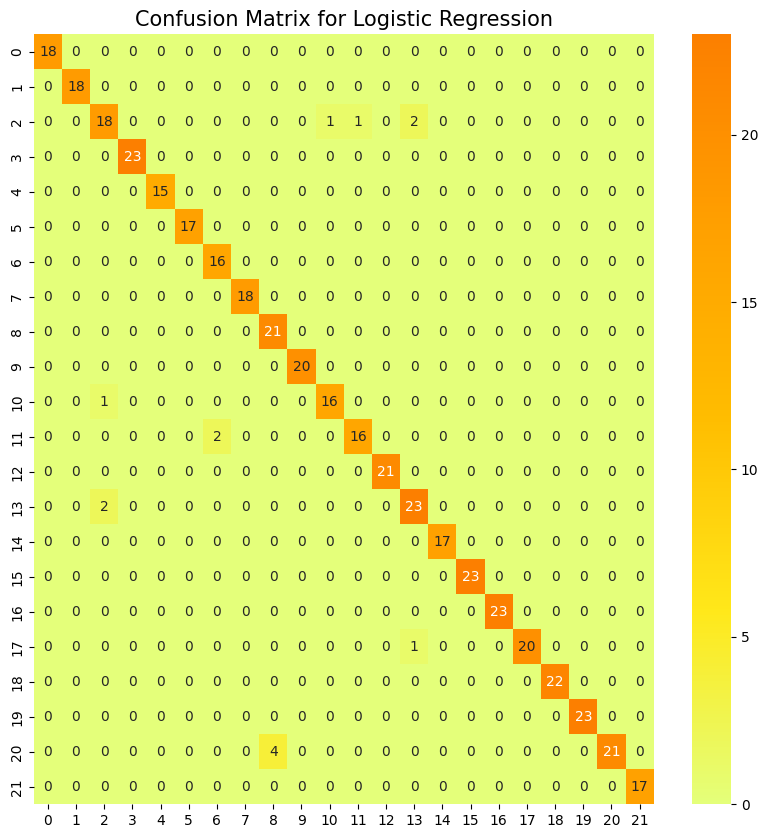

In [22]:
#Lets evaluate the model performance
from sklearn.metrics import confusion_matrix

#Lets print the Confusion Matrix First
plt.rcParams['figure.figsize']=(10,10)
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True, cmap='Wistia')
plt.title('Confusion Matrix for Logistic Regression', fontsize=15)
plt.show()

In [23]:
#Lets print the Classification Report also
from sklearn.metrics import classification_report
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       0.86      0.82      0.84        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       0.89      1.00      0.94        16
      grapes       1.00      1.00      1.00        18
        jute       0.84      1.00      0.91        21
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.94      0.94      0.94        17
       maize       0.94      0.89      0.91        18
       mango       1.00      1.00      1.00        21
   mothbeans       0.88      0.92      0.90        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        23
      papaya       1.00    

In [24]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [25]:
prediction = model.predict((np.array([[90,
                                       40,
                                       40,
                                       20,
                                       80,
                                       7,
                                       200]])))
print("The Suggested Crop for Given Climate Condition is :", prediction)

The Suggested Crop for Given Climate Condition is : ['rice']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
